In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import gdown
import zipfile
import os
import folium

## Merging with Teryt - data about location for geopandas.

In [2]:
# Loading main data from GDrive.
file_id = "110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
df = pd.read_csv(file_extension, sep=",")

Downloading...
From (original): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua
From (redirected): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua&confirm=t&uuid=8fb372ed-df54-465c-b5e1-c4e9e17ba742
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 252M/252M [00:05<00:00, 45.0MB/s] 


In [3]:
# Loading teryt data.
file_id = "16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
teryt = pd.read_csv(file_extension, sep=",")

Downloading...
From: https://drive.google.com/uc?id=16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 13.0MB/s]


In [4]:
# Merging data.
df_with_teryt = pd.merge(df, teryt, left_on=['ad_id'], right_on=['job_id'], how="left")

# Name changes.
df_with_teryt["voivodeship"] = df_with_teryt["WOJ"]
df_with_teryt["district"] = df_with_teryt["POW"]
df_with_teryt.drop(columns=[
    "WOJ", "POW", "job_id"
], inplace=True)
df_with_teryt.head()

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,city,institution,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,130994,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,0.5,1,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,...,2023,1.0,1.0,NaN,nie podano wynagrodzenia,0.666667,0.064683,1.19,16,8
1,130970,0,tech/construction,stanowiska samodzielne,starszy specjalista,3,1.0,1,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,...,2023,0.0,4.0,NaN,nie podano wynagrodzenia,0.580645,0.036010,0.50,4,61
2,130898,1,vet,stanowiska samodzielne,asystent,2,1.0,1,Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,...,2023,0.0,18.0,NaN,"4400,00 zł brutto",0.833333,0.101215,NaN,12,3
3,130919,0,uniformed services,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Komenda Stołeczna Policji w Warszawie,...,2023,NaN,NaN,NaN,"4940,34 zł brutto",NaN,NaN,NaN,14,65
4,130837,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,1.0,1,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,...,2023,1.0,2.0,10268.888889,nie podano wynagrodzenia,0.833333,0.000000,3.00,2,19


## Geolocation data merge

In [5]:
# Now I'm downloading the whole folder from GDrive, which comes as ZIP.
file_id = "1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("wojewodztwa")

# The first is the downloaded ZIP, the second is the zipped folder, and finally, the file.
shapefile_path = os.path.join("wojewodztwa", "wojewodztwa", "wojewodztwa.shp")
wojewodztwa = gpd.read_file(shapefile_path)

Downloading...
From: https://drive.google.com/uc?id=1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 5.41M/5.41M [00:00<00:00, 30.9MB/s]


In [6]:
file_id = "1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("powiaty")

shapefile_path = os.path.join("powiaty", "powiaty", "powiaty.shp")
powiaty = gpd.read_file(shapefile_path)

powiaty.head()

Downloading...
From (original): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw
From (redirected): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw&confirm=t&uuid=5c39e512-2a7e-4b1d-ad9a-1482ad35a336
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 28.2M/28.2M [00:01<00:00, 17.2MB/s]


,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


##### Merging the geopandas object with the main dataframe.

In [7]:
wojewodztwa['JPT_KOD_JE'] = wojewodztwa['JPT_KOD_JE'].astype(int)
merged_wojewodztwa = wojewodztwa.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['voivodeship'], how="inner")

# The categorical code for a district contains the code of its voivodeship at the beginning.
powiaty["JPT_KOD_JE"] = powiaty["JPT_KOD_JE"].str.slice(2,)
powiaty['JPT_KOD_JE'] = powiaty['JPT_KOD_JE'].astype(int)

merged_powiaty = powiaty.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['district'], how="inner")
merged_powiaty.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,0.000,NaN,nie podano wynagrodzenia,1.000000,0.000000,NaN,32,7
1,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,10.875,7483.541667,"nie mniej niż 3600,00 zł brutto",0.591837,0.019916,4.0,6,7
2,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,0.0,0.300,11016.666667,nie podano wynagrodzenia,0.777778,0.111111,5.0,32,7
3,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,0.0,0.200,NaN,nie podano wynagrodzenia,0.625000,0.000000,NaN,8,7
4,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,33.000,NaN,"około 3600,00 zł brutto",0.800000,0.000000,NaN,6,7


## Joining GUS BDL data

#### BDL data preprocessing

In [8]:
# Importing BDL data.

cena_mieszkan = pd.DataFrame()
mediana_wieku = pd.DataFrame()
saldo_migracji = pd.DataFrame() # dotyczy osób w wieku produkcyjnym
wsp_feminizacji = pd.DataFrame()
wydatki_powiat = pd.DataFrame() # w złotówkach
wynagrodzenia = pd.DataFrame() # w złotówkach

bdl_dfs_list = [
    cena_mieszkan,
    mediana_wieku,
    saldo_migracji,
    wsp_feminizacji,
    wydatki_powiat,
    wynagrodzenia
]

file_ids = {
    "cena_mieszkan": "12UWwTtqRazIEctdzxib34fs8I_-ZUOD7",
    "mediana_wieku": "1D8jvho56cqn5dNGhMPaHujF3tmoQ1L6K",
    "saldo_migracji": "1sVL3iXGzc9D2k38ogErl84mVIzl6SzIP",
    "wsp_feminizacji": "163IRO4q5iU-MdyN3kYXkFHDavpyr353f",
    "wydatki_powiat": "1YMXflzDmozNqxQLpcd6oc1e1vtUVyUtS",
    "wynagrodzenia": "104z3VjCcv66e2L034D-o3vJY2wROJwCY"
}

for i in range(len(file_ids)):
    url = f"https://drive.google.com/uc?id={list(file_ids.values())[i]}"
    file_extension = "downloaded_file.csv"
    gdown.download(url, file_extension, quiet=False)
    bdl_dfs_list[i] = pd.read_csv(file_extension, sep=";", on_bad_lines='skip')

Downloading...
From: https://drive.google.com/uc?id=12UWwTtqRazIEctdzxib34fs8I_-ZUOD7
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 204k/204k [00:00<00:00, 3.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D8jvho56cqn5dNGhMPaHujF3tmoQ1L6K
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 144k/144k [00:00<00:00, 2.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sVL3iXGzc9D2k38ogErl84mVIzl6SzIP
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 259k/259k [00:00<00:00, 3.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=163IRO4q5iU-MdyN3kYXkFHDavpyr353f
To: C:\Users\Konrad\Desktop\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 176k/176k [00:00<00:00, 3.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YMX

In [9]:
# Removing unnecessary columns.

unique_columns_to_delete = [
    ["Transakcje rynkowe", "Powierzchnia użytkowa lokali mieszkalnych"],
    ["Migracje", "Wiek"],
    ["Ogółem"],
    ["Wskaźniki"],
    ["Wyszczególnienie"],
    ["Płeć"]
]

for i in range(len(bdl_dfs_list)):
    try:
        bdl_dfs_list[i].drop(["Nazwa", "Jednostka miary", "Atrybut"], axis=1, inplace=True)
        bdl_dfs_list[i] = bdl_dfs_list[i].iloc[:, :-1] # the last column has a different name in every df and is always unnecessary.
    except:
        pass

    # Columns unique for single dataframes.
    for columns in unique_columns_to_delete:
        try:
            bdl_dfs_list[i].drop(columns, axis=1, inplace=True)
        except:
            pass

In [10]:
# Renaming columns with the same name across multiple dataframes.
for i in range(len(bdl_dfs_list)):
    bdl_dfs_list[i].rename(columns={"Wartosc": list(file_ids.keys())[i]}, inplace=True)

#### Joining BDL to main

In [11]:
merged_bdl = merged_powiaty.copy()

# Removing unnecessary columns from the merged dataframe.
columns_to_drop = [
    "gml_id",
    "JPT_SJR_KO",
    "JPT_POWIER",
    "JPT_KOD_JE",
    "JPT_ORGAN_",
    "JPT_JOR_ID",
    "WERSJA_OD",
    "WERSJA_DO",
    "WAZNY_OD",
    "WAZNY_DO",
    "JPT_KOD__1",
    "JPT_NAZWA1",
    "JPT_ORGAN1",
    "JPT_WAZNA_",
    "ID_BUFORA_",
    "ID_BUFORA1",
    "ID_TECHNIC",
    "IIP_PRZEST",
    "IIP_IDENTY",
    "IIP_WERSJA",
    "JPT_KJ_IIP",
    "JPT_KJ_I_1",
    "JPT_KJ_I_2",
    "JPT_OPIS",
    "JPT_SPS_KO",
    "ID_BUFOR_1",
    "JPT_ID",
    "JPT_POWI_1",
    "JPT_KJ_I_3",
    "JPT_GEOMET",
    "JPT_GEOM_1",
    "SHAPE_LENG",
    "SHAPE_AREA",
    "RODZAJ",
]

columns_to_rename = {
    "REGON": "REGON_of_district",
    "wynagrodzenia": "bdl_avg_district_salary_per_year",
    "year_announced": "year",
    "promocja": "advertised_institution",
    "kandydaci": "applicants",
    "views": "ad_views",
    "JPT_NAZWA_": "district_name"
}

merged_bdl.drop(columns_to_drop, axis=1, inplace=True)

for key, value in columns_to_rename.items():
    merged_bdl.rename(columns={key: value}, inplace=True)

In [12]:
# Dropping duplicates.
merged_bdl.drop_duplicates(subset=["ad_id"], inplace=True)
len(merged_bdl)

100795

In [13]:
# Inconsistent data types.
merged_bdl['district'] = merged_bdl['district'].astype(str)
merged_bdl['voivodeship'] = merged_bdl['voivodeship'].astype(str)
merged_bdl['year'] = merged_bdl['year'].astype(int)

In [57]:
for i in range(len(bdl_dfs_list)):
    bdl_dfs_list[i]['Kod'] = bdl_dfs_list[i]['Kod'].astype(str)

    # Single-digits districts include 0 and we want to remove it (e.g. '07' instead of '7').
    mask_1 = (bdl_dfs_list[i]['Kod'].str[2] == "0")
    mask_2 = (bdl_dfs_list[i]['Kod'].str[2] != "0")
    # Dropping rows where length of the code is different than 6.
    mask_3 = (bdl_dfs_list[i]['Kod'].str.len() != 6)

    bdl_dfs_list[i] = bdl_dfs_list[i][~mask_3]
    bdl_dfs_list[i].loc[mask_1, 'district'] = bdl_dfs_list[i].loc[mask_1, 'Kod'].str[3:4]
    bdl_dfs_list[i].loc[mask_2, 'district'] = bdl_dfs_list[i].loc[mask_2, 'Kod'].str[2:4]
    # Voivodeships.
    bdl_dfs_list[i]["voivodeship"] = bdl_dfs_list[i]["Kod"].str[0:2]

    # Inconsistent data types.
    bdl_dfs_list[i]['district'] = bdl_dfs_list[i]['district'].astype(str)
    bdl_dfs_list[i]['voivodeship'] = bdl_dfs_list[i]['voivodeship'].astype(str)
    bdl_dfs_list[i]['Rok'] = bdl_dfs_list[i]['Rok'].astype(int)

    # "0" is the code for all of Poland.
    bdl_dfs_list[i] = bdl_dfs_list[i][bdl_dfs_list[i]["district"] != "0"]
    bdl_dfs_list[i] = bdl_dfs_list[i][bdl_dfs_list[i]["voivodeship"] != "0"]
    bdl_dfs_list[i].drop(['Kod'], axis=1, inplace=True)

    # Merge
    merged_bdl = pd.merge(merged_bdl, bdl_dfs_list[i], left_on=["district", "voivodeship", "year"], right_on=["district", "voivodeship", "Rok"], how="left")
    merged_bdl.drop(["Rok"], axis=1, inplace=True)

In [60]:
# Group by
group_by = "mean"
year_of_choice = ""

# Visualisation of choice for voivodeships.
column_of_choice = input("Type a metric column\n")

# Choose whether the map should tell about all the data or only from a year of choice.
if_subset = input("Subset the data to a particular year?\nType 'yes' or 'no'\n")
if if_subset == "yes":
    year_of_choice = int(input("choose year\n"))
    wojewodztwa_map = merged_bdl[["JPT_NAZWA_", "geometry", column_of_choice, "year_announced"]]
    wojewodztwa_map = merged_bdl[wojewodztwa_map["year_announced"] == year_of_choice]
else:
    wojewodztwa_map = merged_bdl[["JPT_NAZWA_", "geometry", column_of_choice]]

# Aggregation.
aggregated_wojewodztwa_map = (
    wojewodztwa_map.groupby("JPT_NAZWA_")
    .agg({
        column_of_choice: group_by,
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_wojewodztwa_map = gpd.GeoDataFrame(aggregated_wojewodztwa_map, geometry=aggregated_wojewodztwa_map["geometry"])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_wojewodztwa_map.plot(
    column=column_of_choice,
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title(f"Heatmap of {column_of_choice} across voivodeships {year_of_choice}", fontsize=16)
ax.axis("off")

plt.show()

KeyError: "['JPT_NAZWA_'] not in index"

## Maps

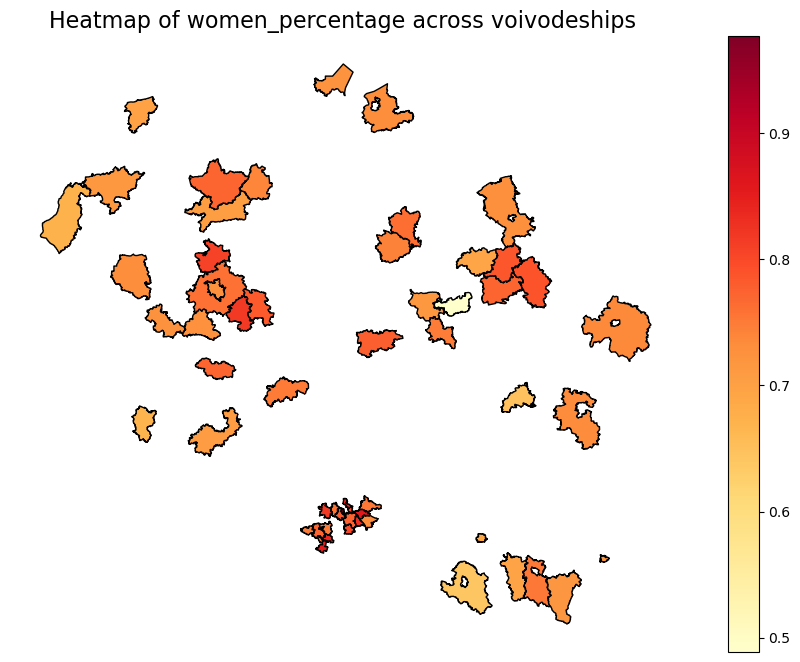

In [63]:
# Group by
group_by = "mean"
year_of_choice = ""

# Visualisation of choice for voivodeships.
column_of_choice = input("Type a metric column\n")

# Choose whether the map should tell about all the data or only from a year of choice.
if_subset = input("Subset the data to a particular year?\nType 'yes' or 'no'\n")
if if_subset == "yes":
    year_of_choice = int(input("choose year\n"))
    wojewodztwa_map = merged_bdl[["district_name", "geometry", column_of_choice, "year_announced"]]
    wojewodztwa_map = wojewodztwa_map[wojewodztwa_map["year_announced"] == year_of_choice]
else:
    wojewodztwa_map = merged_bdl[["district_name", "geometry", column_of_choice]]

# Aggregation.
aggregated_wojewodztwa_map = (
    wojewodztwa_map.groupby("district_name")
    .agg({
        column_of_choice: group_by,
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_wojewodztwa_map = gpd.GeoDataFrame(aggregated_wojewodztwa_map, geometry=aggregated_wojewodztwa_map["geometry"])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_wojewodztwa_map.plot(
    column=column_of_choice,
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title(f"Heatmap of {column_of_choice} across voivodeships {year_of_choice}", fontsize=16)
ax.axis("off")

plt.show()

In [ ]:
merged_bdl['mediana_wieku']

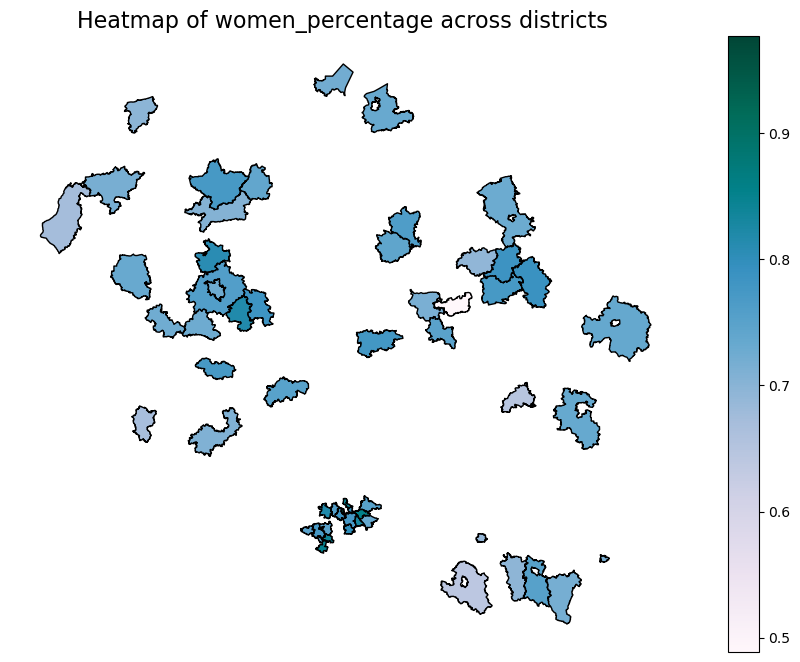

In [62]:
# Group by
group_by = "mean"
year_of_choice = ""

# Visualisation of choice for districts.
column_of_choice = input("Type a metric column\n")

# Choose whether the map should tell about all the data or only from a year of choice.
if_subset = input("Subset the data to a particular year?\nType 'yes' or 'no'\n")
if if_subset == "yes":
    year_of_choice = int(input("choose year\n"))
    powiaty_map = merged_bdl[["district_name", "geometry", column_of_choice, "year_announced"]]
    powiaty_map = powiaty_map[powiaty_map["year_announced"] == year_of_choice]
else:
    powiaty_map = merged_bdl[["district_name", "geometry", column_of_choice]]

# Aggregation.
aggregated_powiaty_map = (
    powiaty_map.groupby("district_name")
    .agg({
        column_of_choice: group_by,
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_powiaty_map = gpd.GeoDataFrame(aggregated_powiaty_map, geometry=aggregated_powiaty_map["geometry"])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_powiaty_map.plot(
    column=column_of_choice,
    cmap="PuBuGn",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title(f"Heatmap of {column_of_choice} across districts {year_of_choice}", fontsize=16)
ax.axis("off")

plt.show()

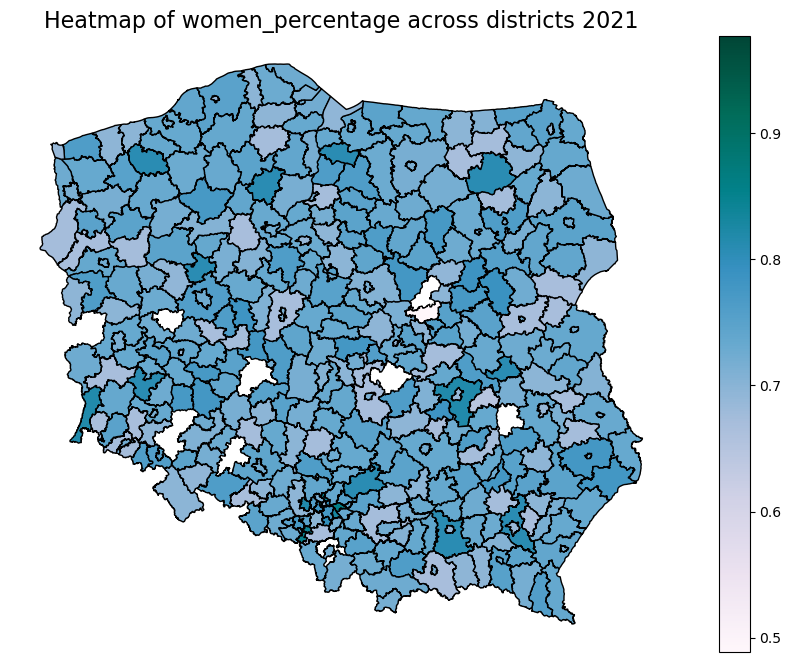

In [18]:
# Copy of the above code for comparison between maps.

# Group by
group_by = "mean"
year_of_choice = ""

# Visualisation of choice for districts.
column_of_choice = input("Type a metric column\n")

# Choose whether the map should tell about all the data or only from a year of choice.
if_subset = input("Subset the data to a particular year?\nType 'yes' or 'no'\n")
if if_subset == "yes":
    year_of_choice = int(input("choose year\n"))
    powiaty_map = merged_powiaty[["district_name", "geometry", column_of_choice, "year_announced"]]
    powiaty_map = powiaty_map[powiaty_map["year_announced"] == year_of_choice]
else:
    powiaty_map = merged_powiaty[["district_name", "geometry", column_of_choice]]

# Aggregation.
aggregated_powiaty_map = (
    powiaty_map.groupby("district_name")
    .agg({
        column_of_choice: group_by,
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_powiaty_map = gpd.GeoDataFrame(aggregated_powiaty_map, geometry=aggregated_powiaty_map["geometry"])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_powiaty_map.plot(
    column=column_of_choice,
    cmap="PuBuGn",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title(f"Heatmap of {column_of_choice} across districts {year_of_choice}", fontsize=16)
ax.axis("off")

plt.show()